In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
import pandas as pd
df = pd.read_csv("../input/clean-16-million-tweets/clean_tweets_again.csv")

In [3]:
df.dropna(inplace = True)
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
X = df['text']
y = df['sentiment']

In [5]:
# the data is split in 98|1|1
from sklearn.model_selection import train_test_split
X_train,X_validation_test,y_train,y_validation_test = train_test_split(X,y,test_size = 0.02,random_state = 45)

In [6]:
X_validation,X_test,y_validation,y_test = train_test_split(X_validation_test,y_validation_test,test_size = 0.5,random_state = 45)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_jobs = -1)

tfidf_knn = TfidfVectorizer(max_features = 95000,stop_words =None,ngram_range = (1,3))
knn_pipeline = Pipeline([('vectorizer',tfidf_knn),('classifier',clf_knn)],verbose = True)
knn_pipeline.fit(X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total= 3.9min
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.3s


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=95000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric

              precision    recall  f1-score   support

           0       0.46      0.71      0.56      5284
           1       0.80      0.60      0.68     10677

    accuracy                           0.63     15961
   macro avg       0.63      0.65      0.62     15961
weighted avg       0.69      0.63      0.64     15961

The accuracy score is 0.6320405989599649


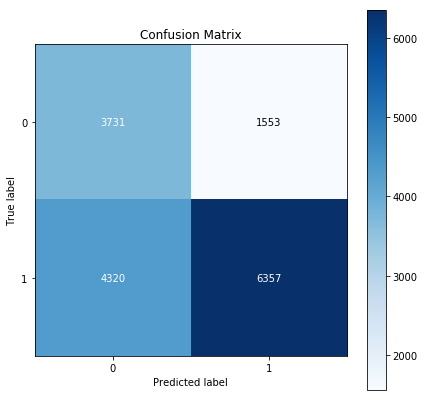

In [8]:
pred = knn_pipeline.predict(X_test)
print(classification_report(pred,y_test))
print('The accuracy score is',accuracy_score(pred,y_test))
plot_confusion_matrix(pred, y_test,figsize=(7,7))

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(n_jobs = -1)

tfidf_dt = TfidfVectorizer(max_features = 95000,stop_words =None,ngram_range = (1,3))
dt_pipeline = Pipeline([('vectorizer',tfidf_dt),('classifier',clf_dt)],verbose = True)
dt_pipeline.fit(X_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [10]:
pred = dt_pipeline.predict(X_test)
print(classification_report(pred,y_test))
print('The accuracy score is',accuracy_score(pred,y_test))
plot_confusion_matrix(pred, y_test,figsize=(7,7))

NameError: name 'dt_pipeline' is not defined